In [112]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 
import string
import nltk 
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')


In [113]:
df = pd.read_csv('twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [114]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [115]:
#Data Cleaning
df = df.drop("2401", axis=1)
df = df.drop("Borderlands", axis=1)

In [116]:
df

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
74676,Positive,Just realized that the Windows partition of my...
74677,Positive,Just realized that my Mac window partition is ...
74678,Positive,Just realized the windows partition of my Mac ...
74679,Positive,Just realized between the windows partition of...


In [117]:
# Sentiment: Bool -> Bin
df["Positive"] = df["Positive"].apply(lambda x: 0 if x=="Positive" or x== "Netural" else 1)


In [118]:
df

,Positive,"im getting on borderlands and i will murder you all ,"
0,0,I am coming to the borders and I will kill you...
1,0,im getting on borderlands and i will kill you ...
2,0,im coming on borderlands and i will murder you...
3,0,im getting on borderlands 2 and i will murder ...
4,0,im getting into borderlands and i can murder y...
...,...,...
74676,0,Just realized that the Windows partition of my...
74677,0,Just realized that my Mac window partition is ...
74678,0,Just realized the windows partition of my Mac ...
74679,0,Just realized between the windows partition of...


In [119]:
df = df.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweets'})
df = df.rename(columns={'Positive': 'Sentiment'})
df

,Sentiment,Tweets
0,0,I am coming to the borders and I will kill you...
1,0,im getting on borderlands and i will kill you ...
2,0,im coming on borderlands and i will murder you...
3,0,im getting on borderlands 2 and i will murder ...
4,0,im getting into borderlands and i can murder y...
...,...,...
74676,0,Just realized that the Windows partition of my...
74677,0,Just realized that my Mac window partition is ...
74678,0,Just realized the windows partition of my Mac ...
74679,0,Just realized between the windows partition of...


In [120]:
#removing special characters and numbers
df['Tweets']= df['Tweets'].str.replace('[^a-zA-Z#]',' ')
df

,Sentiment,Tweets
0,0,I am coming to the borders and I will kill you...
1,0,im getting on borderlands and i will kill you ...
2,0,im coming on borderlands and i will murder you...
3,0,im getting on borderlands 2 and i will murder ...
4,0,im getting into borderlands and i can murder y...
...,...,...
74676,0,Just realized that the Windows partition of my...
74677,0,Just realized that my Mac window partition is ...
74678,0,Just realized the windows partition of my Mac ...
74679,0,Just realized between the windows partition of...


In [121]:
#removing 1-2 letter words
df['Tweets'] = df['Tweets'].apply(lambda x: str(x)) 
df['Tweets'] = df['Tweets'].apply(lambda x: "  ".join([w for w in x.split() if len(w)>3]))
df

,Sentiment,Tweets
0,0,"coming borders will kill all,"
1,0,"getting borderlands will kill all,"
2,0,"coming borderlands will murder all,"
3,0,"getting borderlands will murder all,"
4,0,"getting into borderlands murder all,"
...,...,...
74676,0,Just realized that Windows partition like...
74677,0,Just realized that window partition years...
74678,0,Just realized windows partition years beh...
74679,0,Just realized between windows partition l...


In [122]:
#create list of all words
tweet_word = df['Tweets'].apply(lambda x: x.split())
tweet_word

0                      [coming, borders, will, kill, all,]
1                 [getting, borderlands, will, kill, all,]
2                [coming, borderlands, will, murder, all,]
3               [getting, borderlands, will, murder, all,]
4               [getting, into, borderlands, murder, all,]
                               ...                        
74676    [Just, realized, that, Windows, partition, lik...
74677    [Just, realized, that, window, partition, year...
74678    [Just, realized, windows, partition, years, be...
74679    [Just, realized, between, windows, partition, ...
74680    [Just, like, windows, partition, like, years, ...
Name: Tweets, Length: 74681, dtype: object

In [123]:
#stem words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tweet_word = tweet_word.apply(lambda tweet: [stemmer.stem(word) for word in tweet])


In [124]:
tweet_word

0                         [come, border, will, kill, all,]
1                      [get, borderland, will, kill, all,]
2                   [come, borderland, will, murder, all,]
3                    [get, borderland, will, murder, all,]
4                    [get, into, borderland, murder, all,]
                               ...                        
74676    [just, realiz, that, window, partit, like, yea...
74677    [just, realiz, that, window, partit, year, beh...
74678    [just, realiz, window, partit, year, behind, n...
74679    [just, realiz, between, window, partit, like, ...
74680    [just, like, window, partit, like, year, behin...
Name: Tweets, Length: 74681, dtype: object

In [125]:
#combine words 
for i in range(len(tweet_word)):
    tweet_word[i] = " ".join(tweet_word[i])
df["Tweets"] = tweet_word

df

,Sentiment,Tweets
0,0,"come border will kill all,"
1,0,"get borderland will kill all,"
2,0,"come borderland will murder all,"
3,0,"get borderland will murder all,"
4,0,"get into borderland murder all,"
...,...,...
74676,0,just realiz that window partit like year behin...
74677,0,just realiz that window partit year behind nvi...
74678,0,just realiz window partit year behind nvidia d...
74679,0,just realiz between window partit like be year...


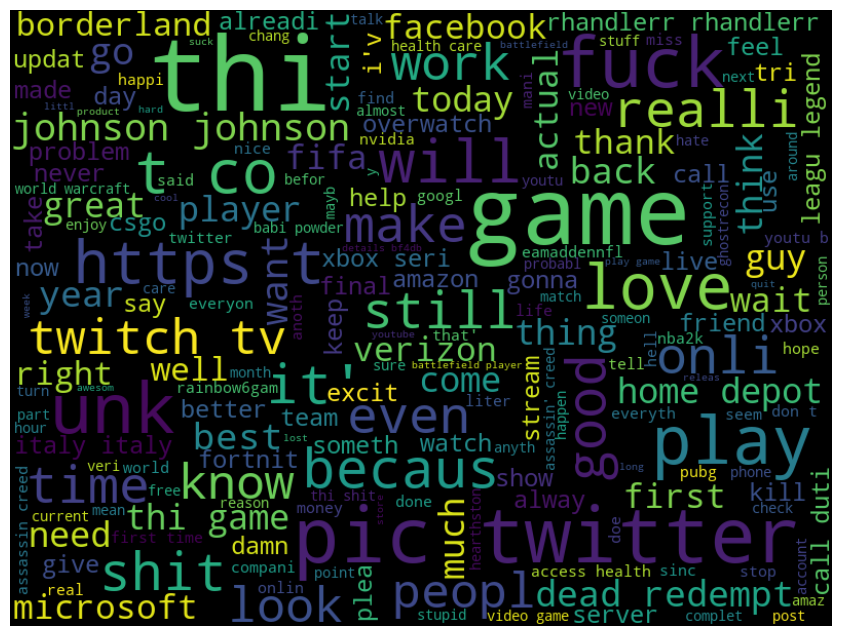

In [126]:
#Data Analysis

all_words = " ".join([sentence for sentence in df['Tweets']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=42, max_font_size=100).generate(all_words)

#plot
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [127]:
#extract hashtag function
def hashtag_extraction(tweets):
    hashtags = []
    for tweet in tweets:
        if tweet.count("#") == 0:
            hashtags
        else:
            ht = re.findall(r'#(\w+)', tweet)
            hashtags.append(ht)
    return hashtags


In [128]:
#extract hashtag from positive tweets
ht_positive = hashtag_extraction(df['Tweets'][df['Sentiment']==0])
ht_negative = hashtag_extraction(df['Tweets'][df['Sentiment']==1])



In [129]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df["Tweets"])


In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Sentiment'], random_state=42, test_size=0.20)

In [131]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [132]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [133]:
#testing
pred = model.predict(x_test)
f1_score(y_test, pred)

0.8545999218512569

In [134]:
accuracy_score(y_test,pred)

0.7757916582981857

In [135]:
#using probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(int)

f1_score(y_test, pred)

0.8462503541219799

In [136]:
accuracy_score(y_test,pred)

0.7456651268661713